In [17]:
import boto3
from PIL import Image

BUCKET = "amazon-rekognition2"
region = "us-east-1"
#KEY_SOURCE = "target.jpg"
#KEY_TARGET = "teste.jpg"
KEY_SOURCE = "gabigol.jpg"
KEY_TARGET = "gabigordo.png"

image_source=boto3.client('s3').get_object(Bucket=BUCKET,Key=KEY_SOURCE)['Body']
image_target=boto3.client('s3').get_object(Bucket=BUCKET,Key=KEY_TARGET)['Body']

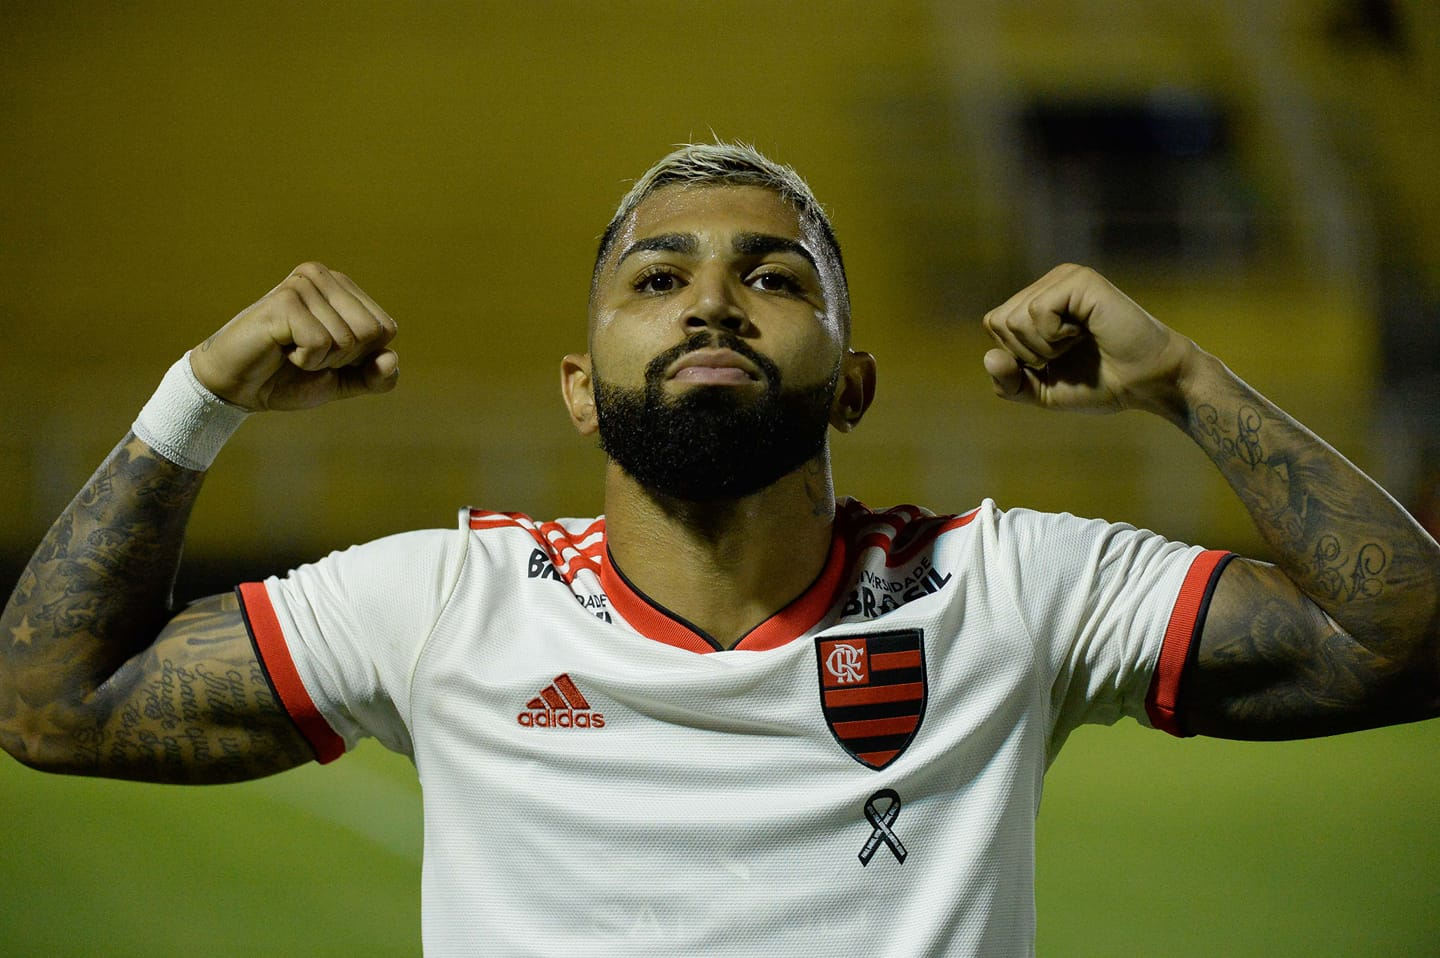

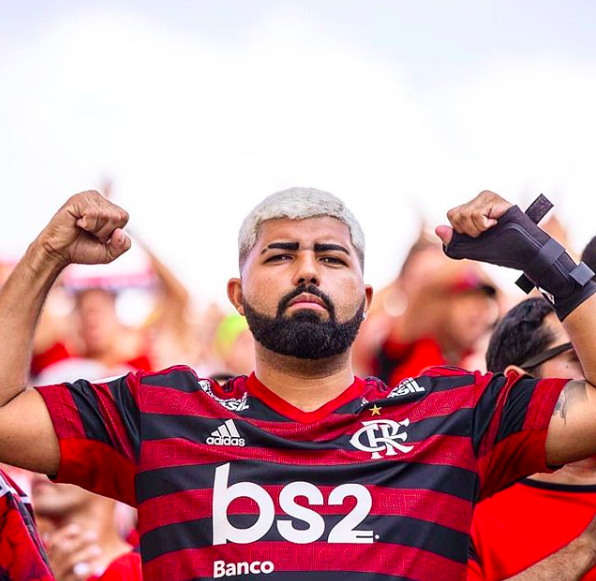

In [18]:
from IPython.display import display
display(Image.open(image_source))
display(Image.open(image_target))

In [11]:
def compare_faces(bucket, key, bucket_target, key_target, threshold=5, region="us-east-1"):
	rekognition = boto3.client("rekognition", region)
	response = rekognition.compare_faces(
	    SourceImage={
			"S3Object": {
				"Bucket": bucket,
				"Name": key,
			}
		},
		TargetImage={
			"S3Object": {
				"Bucket": bucket_target,
				"Name": key_target,
			}
		},
	SimilarityThreshold=threshold,
	)
	print(response)
	return response['SourceImageFace'], response['FaceMatches']


In [19]:
source_face, matches = compare_faces(BUCKET, KEY_SOURCE, BUCKET, KEY_TARGET)

# the main source face
print("Source Face ({Confidence}%)".format(**source_face))

# one match for each target face
for match in matches:
	print("Target Face ({Confidence}%)".format(**match['Face']))
	print("  Similarity : {}%".format(match['Similarity']))


{'SourceImageFace': {'BoundingBox': {'Width': 0.1595466136932373, 'Height': 0.2863277494907379, 'Left': 0.4114476442337036, 'Top': 0.19222846627235413}, 'Confidence': 99.9998779296875}, 'FaceMatches': [{'Similarity': 53.92933654785156, 'Face': {'BoundingBox': {'Width': 0.1925736516714096, 'Height': 0.2314913272857666, 'Left': 0.42143529653549194, 'Top': 0.3762219250202179}, 'Confidence': 100.0, 'Landmarks': [{'Type': 'eyeLeft', 'X': 0.47370094060897827, 'Y': 0.4447242021560669}, {'Type': 'eyeRight', 'X': 0.5560399293899536, 'Y': 0.4482933580875397}, {'Type': 'mouthLeft', 'X': 0.4796890616416931, 'Y': 0.5285285711288452}, {'Type': 'mouthRight', 'X': 0.5477545261383057, 'Y': 0.5314624905586243}, {'Type': 'nose', 'X': 0.5174882411956787, 'Y': 0.47165757417678833}], 'Pose': {'Roll': 2.565345048904419, 'Yaw': 11.270252227783203, 'Pitch': 20.226083755493164}, 'Quality': {'Brightness': 87.49158477783203, 'Sharpness': 92.22801208496094}}}], 'UnmatchedFaces': [], 'ResponseMetadata': {'RequestId